Used for Running and Testing of the Borehole Composite Log Generation Code

# Imports

In [1]:
import sys
import os

import pandas as pd

sys.path.append(r'\\prod.lan\active\proj\futurex\Common\Working\Mike\GitHub\hydrogeol_utils\\')
from hydrogeol_utils.borehole_utils import extract_all_boredata_by_simple_query 
from hydrogeol_utils.plotting_utils import drawCompLog
from hydrogeol_utils.db_utils import makeCon, closeCon

# Connect to SpatialLite DBase

In [2]:
db_path = r'\\prod.lan\active\proj\futurex\East_Kimberley\Working\SharedWorkspace\Bores_working\compilation\spatialite\East_Kimberley_borehole_data.sqlite'

con = makeCon(db_path)
con

Connected to \\prod.lan\active\proj\futurex\East_Kimberley\Working\SharedWorkspace\Bores_working\compilation\spatialite\East_Kimberley_borehole_data.sqlite. Temporary working copy created.


# Run over all holes in database

In [4]:
# make query to extract all ENOs and borehole names from database
bh_list_query = 'select borehole_id, Borehole_name, Alternative_name from borehole'
# run query
bh_list = pd.read_sql_query(bh_list_query,con)

# Loop through each hole by ENO
for i, (bhid, bhname, altname) in bh_list.iterrows():
#     bhid, bhname = bh_list.loc[i]
    # extract all the data for that borehole into a dict of dataframes
    data = extract_all_boredata_by_simple_query(con, bhid)
    # draw the composite log for that hole.
    # note, when the output_path variable is supplied, the drawFunction only outputs to file
    # remove this parameter to see the results inline
    if altname is None:
        drawCompLog(data, output_path = r'\\prod.lan\active\proj\futurex\East_Kimberley\Working\SharedWorkspace\Bores_working\GAHoles_CompositeLogs\{}_complog'.format(bhname))
    else:
        drawCompLog(data, output_path = r'\\prod.lan\active\proj\futurex\East_Kimberley\Working\SharedWorkspace\Bores_working\GAHoles_CompositeLogs\{}_{}_complog'.format(bhname, altname))

# Close the DB connection
closeCon(con, db_path)

C:\Users\u19955\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Connection to \\prod.lan\active\proj\futurex\East_Kimberley\Working\SharedWorkspace\Bores_working\compilation\spatialite\East_Kimberley_borehole_data.sqlite is closed. Temporary working copy removed.


# Test on a single hole

C:\Users\u19955\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


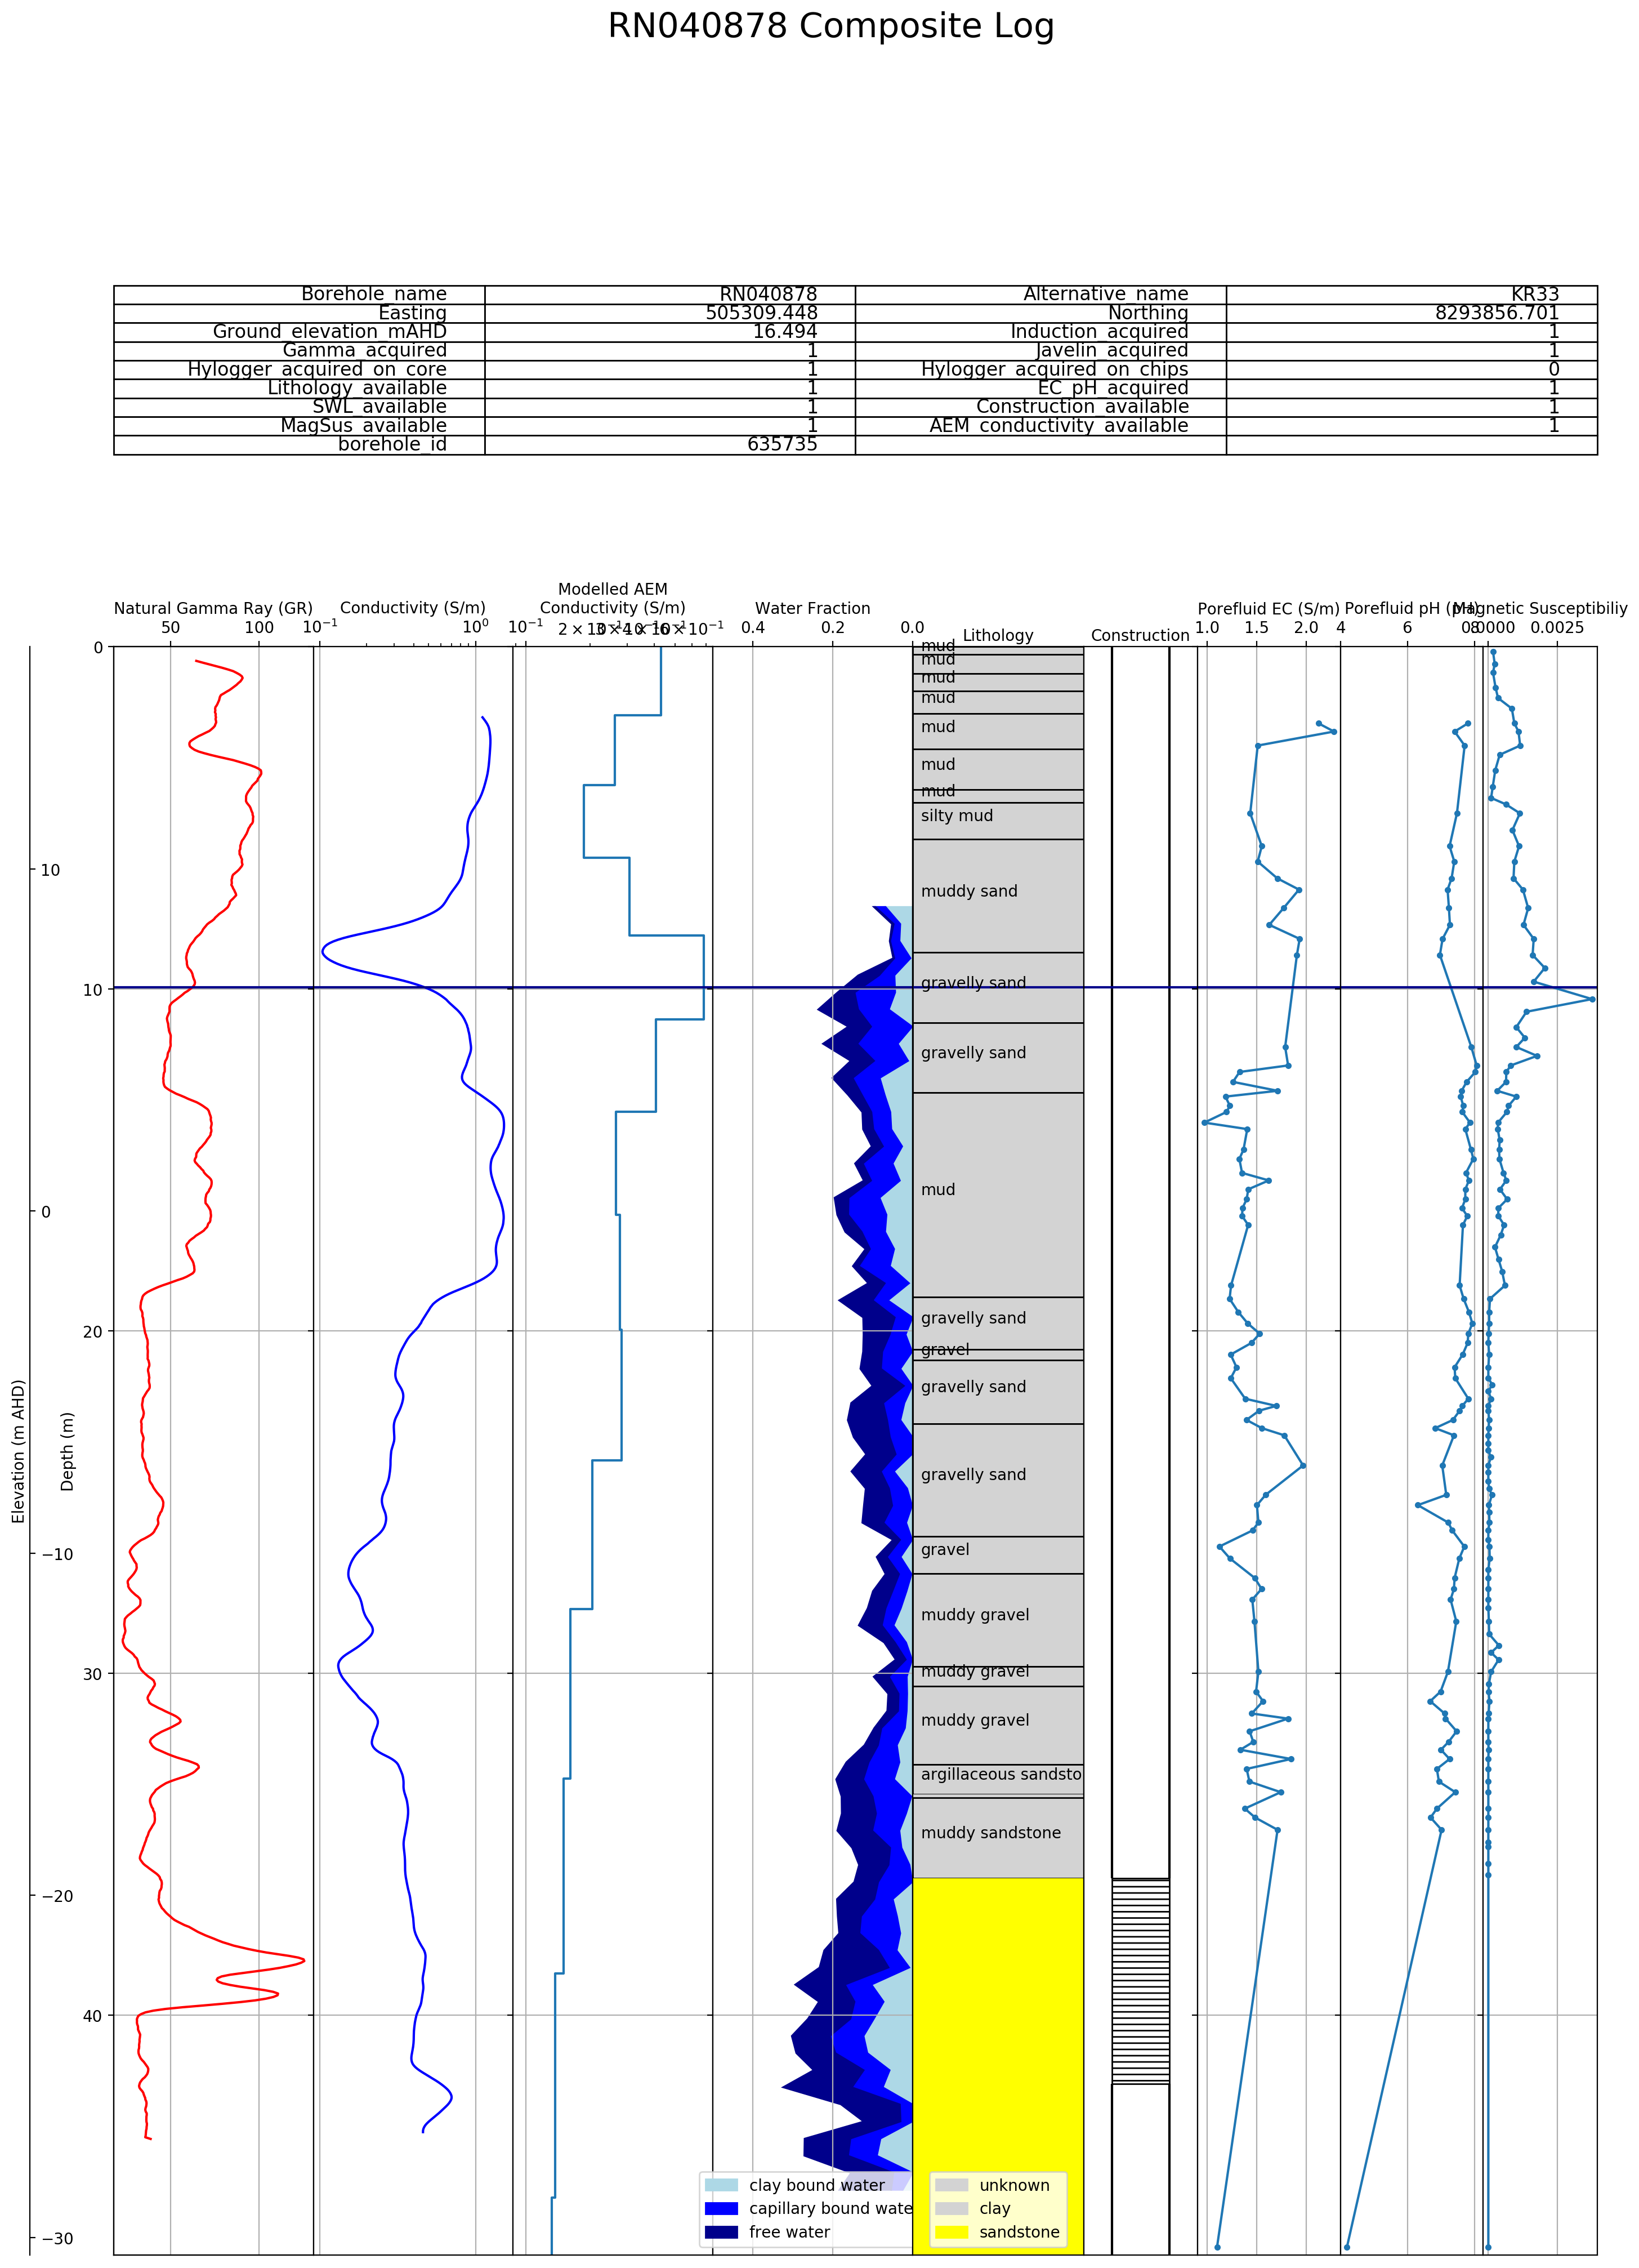

In [3]:
bhid = bhname = 635735 # ENO for KR55
data = extract_all_boredata_by_simple_query(con, bhid)
drawCompLog(data)

# Close the DB connection
# closeCon(con, db_path)